# Part 1

### Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

C:\Users\schne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Libraries imported.


In [2]:
#Download the wiki table to a readable df format
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
print(df.shape)
df.head()


(180, 3)


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"



### Data Preprocessing

In [3]:
#Remove entries where Borough = "Not Assigned"
df = df[df.Borough != "Not assigned"]

In [4]:
#Check if any neighborhoods are still unassigned 
df[df['Neighborhood'] == 'Not assigned'].head(30)

,Postal Code,Borough,Neighborhood


In [5]:
#If neighborhoods still contain "Not Assigned", but have an associated Borough, run the code below to transform Neighborhood NA's to Burough name
df['Neighborhood'].replace({'Not assigned':df['Borough']}, inplace = True)

In [6]:
#Reset df index
df = df.reset_index(drop=True)
df.head(30)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### Check the shape of the data frame

In [7]:
df.shape

(103, 3)

### Append LatLng Coordinates to Area Code

In [9]:
df_latlng=pd.read_csv("http://cocl.us/Geospatial_data")

In [10]:
postal_code=df["Postal Code"]

In [11]:
df_latlng

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:
df=df.merge(df_latlng, left_on = "Postal Code", right_on = "Postal Code")

In [13]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### Geocoder package unreliable. To be used with a later version

In [14]:
#import geocoder 

# initialize your variable to None
#lat_lng_coords = None
# loop until you get the coordinates#while(lat_lng_coords is None):
   # g = geocoder.google('{}, Toronto, Ontario'.format(df['Postal Code']), maxRows = 103)
   # lat_lng_coords = g.latlng
    
    
#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

# Part 3

In [15]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


In [16]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Create dataframe for 'Toronto' Boroughs

#### Isolate Buroughs containing name "Toronto"

In [17]:
toronto_data = df[df['Borough'].str.contains('Toronto', regex = False)].reset_index(drop=True)
toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [18]:
toronto_data.describe

<bound method NDFrame.describe of    Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M7A  Downtown Toronto   
2          M5B  Downtown Toronto   
3          M5C  Downtown Toronto   
4          M4E      East Toronto   
5          M5E  Downtown Toronto   
6          M5G  Downtown Toronto   
7          M6G  Downtown Toronto   
8          M5H  Downtown Toronto   
9          M6H      West Toronto   
10         M5J  Downtown Toronto   
11         M6J      West Toronto   
12         M4K      East Toronto   
13         M5K  Downtown Toronto   
14         M6K      West Toronto   
15         M4L      East Toronto   
16         M5L  Downtown Toronto   
17         M4M      East Toronto   
18         M4N   Central Toronto   
19         M5N   Central Toronto   
20         M4P   Central Toronto   
21         M5P   Central Toronto   
22         M6P      West Toronto   
23         M4R   Central Toronto   
24         M5R   Central Toronto   
25         M6R      West Toron

In [19]:
# create map of Toronto(burough) using latitude and longitude values
map_toronto_b = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_b)  
    
map_toronto_b

### Hide

In [20]:
#@hidden_cell
CLIENT_ID = '1P3HBU5ISMR5YVJ1JLUMNR0LDKKGCVTZVXT354TSIJHJGWEE' # your Foursquare ID
CLIENT_SECRET = 'FHGBAV33NAO3MVLJ1STYM042ZHTBOAWRKD041FSQDVT4GAAE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1P3HBU5ISMR5YVJ1JLUMNR0LDKKGCVTZVXT354TSIJHJGWEE
CLIENT_SECRET:FHGBAV33NAO3MVLJ1STYM042ZHTBOAWRKD041FSQDVT4GAAE


In [21]:
neighborhood_lat = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_long = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

In [22]:
limit = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
####code to run the above function on each neighborhood and create a new dataframe called *df_venues*

toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [24]:
print(toronto_data_venues.shape)
toronto_data_venues.head()


(1625, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [25]:
toronto_data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18,18,18,18,18,18
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,70,70,70,70,70,70
Christie,16,16,16,16,16,16
Church and Wellesley,71,71,71,71,71,71
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [26]:
## Number of Unique Categoriges
print('There are {} uniques categories.'.format(len(toronto_data_venues['Venue Category'].unique())))

There are 232 uniques categories.


### Format Data for K-Means Clustering

In [27]:
# one hot encoding
toronto_data_onehot = pd.get_dummies(toronto_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
toronto_data_onehot['Neighborhood'] = toronto_data_venues['Neighborhood'] 
toronto_data_onehot.head()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:
# move neighborhood column to the first column
fixed_columns = [toronto_data_onehot.columns[-1]] + list(toronto_data_onehot.columns[:-1])
print(fixed_columns)

toronto_data_onehot = toronto_data_onehot[fixed_columns]
toronto_data_onehot.head()

['Neighborhood', ' Airport', ' Airport Food Court', ' Airport Lounge', ' Airport Service', ' Airport Terminal', ' American Restaurant', ' Antique Shop', ' Aquarium', ' Art Gallery', ' Art Museum', ' Arts & Crafts Store', ' Asian Restaurant', ' Auto Workshop', ' BBQ Joint', ' Baby Store', ' Bagel Shop', ' Bakery', ' Bank', ' Bar', ' Baseball Stadium', ' Basketball Stadium', ' Beach', ' Bed & Breakfast', ' Beer Bar', ' Beer Store', ' Belgian Restaurant', ' Bistro', ' Board Shop', ' Boat or Ferry', ' Bookstore', ' Boutique', ' Brazilian Restaurant', ' Breakfast Spot', ' Brewery', ' Bubble Tea Shop', ' Building', ' Burger Joint', ' Burrito Place', ' Bus Line', ' Butcher', ' Café', ' Cajun / Creole Restaurant', ' Camera Store', ' Candy Store', ' Caribbean Restaurant', ' Cheese Shop', ' Chinese Restaurant', ' Chocolate Shop', ' Church', ' Climbing Gym', ' Clothing Store', ' Cocktail Bar', ' Coffee Shop', ' College Arts Building', ' College Auditorium', ' College Gym', ' College Rec Center', 

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
toronto_data_onehot.shape

(1625, 233)

In [30]:
toronto_data_grouped = toronto_data_onehot.groupby('Neighborhood').mean().reset_index()


In [31]:
toronto_data_grouped.shape

(39, 233)

In [32]:
num_top_venues = 5

for hood in toronto_data_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_data_grouped[toronto_data_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
             venue  freq
0      Coffee Shop  0.09
1     Cocktail Bar  0.05
2           Bakery  0.03
3   Farmers Market  0.03
4      Cheese Shop  0.03


----Brockton, Parkdale Village, Exhibition Place----
             venue  freq
0             Café  0.13
1   Breakfast Spot  0.09
2      Coffee Shop  0.09
3           Bakery  0.04
4        Pet Store  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                 venue  freq
0   Light Rail Station  0.11
1                  Spa  0.06
2                 Park  0.06
3           Comic Shop  0.06
4     Recording Studio  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                  venue  freq
0       Airport Service  0.21
1               Airport  0.07
2                 Plane  0.07
3           Coffee Shop  0.07
4   Rental Car Location  0.07


----Central Bay Street----
                  venue  freq


In [33]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

['Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [35]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_data_grouped['Neighborhood']
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Brockton, Parkdale Village, Exhibition Place",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Business reply mail Processing Centre, South C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"CN Tower, King and Spadina, Railway Lands, Har...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Bay Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print(np.arange(toronto_data_grouped.shape[0]))
for ind in np.arange(toronto_data_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_data_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Cheese Shop,Pharmacy,Café,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Yoga Studio,Stadium,Burrito Place,Restaurant,Climbing Gym,Grocery Store,Bakery
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Farmers Market,Garden,Park,Pizza Place,Recording Studio,Restaurant,Butcher,Burrito Place,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport,Boat or Ferry,Plane,Coffee Shop,Rental Car Location,Sculpture Garden,Boutique,Harbor / Marina,Airport Food Court
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Bubble Tea Shop,Bar,Thai Restaurant,Salad Place,Burger Joint


## K-Means Clustering

In [38]:
# set number of clusters
kclusters = 5

toronto_data_grouped_clustering = toronto_data_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_data_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Check for Optimal K (elbow Method)

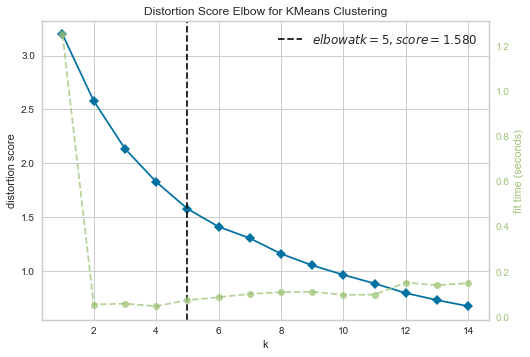

In [43]:
# Instantiate the clustering model and visualizer
model = KMeans().fit(toronto_data_grouped_clustering)
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(toronto_data_grouped_clustering)        # Fit the data to the visualizer
visualizer.show() 

#### Optimal K appears to be '5'. exponential nature of distortion makes for suspect of validity of using K-Means Clustinger

In [56]:
# set number of clusters
kclusters = 5

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# add clustering labels #Comment this cell when run
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [58]:

toronto_data_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_data_merged = toronto_data_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_data_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Breakfast Spot,Café,Pub,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place,Café,College Auditorium
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Hotel,Bubble Tea Shop,Café,Lingerie Store,Diner,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Restaurant,Cosmetics Shop,Cocktail Bar,American Restaurant,Beer Bar,Moroccan Restaurant,Department Store,Lingerie Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Neighborhood,Health Food Store,Pub,Trail,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Department Store,Donut Shop


In [59]:
#Remove N/A Values
#toronto_data_merged=toronto_data_merged.dropna()

In [60]:
# check the data type
#toronto_data_merged['Cluster Labels']=toronto_data_merged['Cluster Labels'].astype(int)

In [61]:
toronto_data_merged.dtypes

Postal Code                object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data_merged['Latitude'], toronto_data_merged['Longitude'], toronto_data_merged['Neighborhood'], toronto_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Coffee and Quick Bites Cluster

In [63]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 0, toronto_data_merged.columns[[1] + list(range(5, toronto_data_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Park,Breakfast Spot,Café,Pub,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,Downtown Toronto,0,Coffee Shop,Diner,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Burrito Place,Sandwich Place,Café,College Auditorium
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Hotel,Bubble Tea Shop,Café,Lingerie Store,Diner,Ramen Restaurant
3,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Cosmetics Shop,Cocktail Bar,American Restaurant,Beer Bar,Moroccan Restaurant,Department Store,Lingerie Store
4,East Toronto,0,Neighborhood,Health Food Store,Pub,Trail,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Department Store,Donut Shop
5,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Farmers Market,Restaurant,Cheese Shop,Pharmacy,Café,Beer Bar
6,Downtown Toronto,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Bubble Tea Shop,Bar,Thai Restaurant,Salad Place,Burger Joint
7,Downtown Toronto,0,Grocery Store,Café,Park,Restaurant,Diner,Candy Store,Baby Store,Nightclub,Italian Restaurant,Coffee Shop
8,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Clothing Store,Gym,Deli / Bodega,Thai Restaurant,Bakery,Bookstore
9,West Toronto,0,Pharmacy,Bakery,Park,Music Venue,Café,Middle Eastern Restaurant,Supermarket,Bar,Recording Studio,Bank


# Outdoor and Recreation Cluster

In [64]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 1, toronto_data_merged.columns[[1] + list(range(5, toronto_data_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,1,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
33,Downtown Toronto,1,Park,Playground,Trail,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


# Random Cluster 1

In [65]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 2, toronto_data_merged.columns[[1] + list(range(5, toronto_data_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,2,Trail,Park,Restaurant,Lawyer,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio


# Random Cluster 2

In [66]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 3, toronto_data_merged.columns[[1] + list(range(5, toronto_data_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,3,Mexican Restaurant,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


# Random Cluster 3

In [67]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 4, toronto_data_merged.columns[[1] + list(range(5, toronto_data_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,4,Garden,Home Service,Yoga Studio,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop
